In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# Load data
df = pd.read_csv('AZN-AstraZeneca.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,41.610001,41.759998,41.480000,41.759998,36.845528,4590000
1,2019-03-04,41.730000,41.810001,41.389999,41.689999,36.783760,3948200
2,2019-03-05,41.560001,42.610001,41.560001,42.310001,37.330803,5668200
3,2019-03-06,42.360001,42.389999,41.930000,42.029999,37.083748,2490000
4,2019-03-07,41.610001,41.770000,41.330002,41.660000,36.757298,5283900
...,...,...,...,...,...,...,...
1254,2024-02-23,64.959999,65.930000,64.949997,65.830002,65.830002,7388200
1255,2024-02-26,66.080002,66.370003,65.750000,65.930000,65.930000,4597900
1256,2024-02-27,65.940002,66.459999,65.769997,66.330002,66.330002,4433500
1257,2024-02-28,65.459999,65.779999,65.160004,65.349998,65.349998,6030600


In [3]:
df1=df.reset_index()['Close']

In [4]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
# Split train and test data
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
# Function to create dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [9]:
# Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


D:\Anaconda\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Fit model with train data
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 0.0658
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0093
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0034
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0030
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0026
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0020
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0015
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0014
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0013
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0011
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0010
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 8.8304e-04
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 9.7065e-04
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 8.6098e-04
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s

In [11]:
# Predict train and test data
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Absolute Error (MAE): 65.70756851856979
Mean Squared Error (MSE): 4337.687447898747
R-squared (R2): -286575.0810775199
Root Mean Squared Error (RMSE): 65.86112243120935
Mean Absolute Percentage Error (MAPE): 8898.871377113901%


In [13]:
# Predict next 60 days
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 60):
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

[0.70394415]
101
1 day input [0.77238523 0.79756044 0.79756044 0.8001558  0.77991186 0.79262917
 0.83052169 0.7256683  0.70438618 0.68907355 0.6688295  0.70827931
 0.69893591 0.6781729  0.63872309 0.66597458 0.67350121 0.68777578
 0.69815732 0.69244746 0.69478341 0.68336368 0.68128733 0.69582138
 0.67194393 0.68569952 0.69945509 0.67090586 0.68829485 0.69685956
 0.68803537 0.70075268 0.68336368 0.70646254 0.68466135 0.67531795
 0.69660017 0.70879828 0.71398917 0.71995844 0.69374523 0.68284458
 0.68076822 0.67402029 0.68050874 0.69296656 0.74279792 0.75447702
 0.71424876 0.74409548 0.74279792 0.73968338 0.75317946 0.75291987
 0.75837015 0.78043083 0.77913327 0.78043083 0.80768242 0.80560607
 0.81754479 0.80716322 0.82870493 0.82091892 0.83804832 0.82792634
 0.8341552  0.7783545  0.7518817  0.75888915 0.75940832 0.77498055
 0.7648586  0.76096548 0.77186605 0.77394238 0.77627832 0.77653773
 0.76200365 0.76745393 0.73604985 0.72307295 0.77238523 0.75966791
 0.68102781 0.64832597 0.62626529

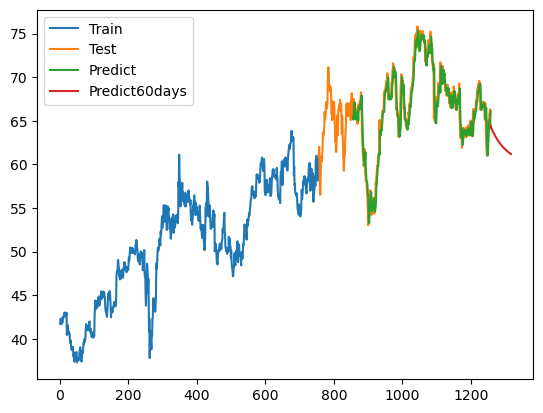

In [14]:
# Plot the results
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
plt.plot(test_data_index, y_pred)
prediect_data_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 59, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.savefig('Image/GRU_64_60days_AZN.png')
plt.show()
